In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="87lYBLXNFplBDHsU3BY5")
project = rf.workspace("manikantaallanki").project("wheatspikedetection")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.


In [2]:
dataset.version

'1'

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
%cd {HOME}


/content


In [6]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

New https://pypi.org/project/ultralytics/8.2.14 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/wheatspikedetection-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augm

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
test = '/content/drive/MyDrive/ComputerVisionProject/real_test_images'

In [19]:
import subprocess
import re

# Define your command
command = 'yolo task=detect mode=predict model={}/runs/detect/train2/weights/best.pt conf=0.5 source={}'.format(HOME, test)

# Run the command and capture output
result = subprocess.run(command, shell=True, capture_output=True, text=True)

# Print the full output (optional)
print(result.stdout)

# Parse the output to find the number of wheats detected per image
wheat_counts = re.findall(r': \d+x\d+ (\d+) wheats', result.stderr)

# Convert counts to integers
wheat_counts = [int(count) for count in wheat_counts]

# Example usage: print the total number of wheats detected
print(f'Total wheats detected: {sum(wheat_counts)}')

# To see counts per image (optional)
print(wheat_counts)



Total wheats detected: 38151
[27, 44, 30, 16, 57, 10, 24, 65, 29, 70, 35, 31, 33, 39, 49, 48, 59, 12, 3, 59, 67, 30, 60, 17, 41, 68, 7, 48, 48, 64, 47, 28, 8, 38, 53, 51, 50, 24, 16, 52, 18, 57, 51, 37, 40, 21, 22, 10, 70, 16, 54, 13, 17, 47, 41, 4, 11, 60, 17, 75, 42, 15, 61, 26, 29, 47, 74, 21, 20, 68, 29, 68, 59, 6, 44, 61, 33, 30, 51, 43, 69, 66, 61, 49, 9, 34, 57, 43, 42, 24, 68, 40, 73, 24, 24, 56, 29, 24, 69, 25, 65, 35, 24, 10, 72, 16, 23, 28, 55, 60, 31, 49, 30, 23, 23, 53, 39, 54, 82, 21, 50, 71, 53, 14, 45, 14, 49, 55, 39, 26, 24, 37, 26, 48, 25, 48, 5, 79, 17, 7, 11, 47, 51, 73, 32, 31, 10, 37, 20, 13, 50, 18, 11, 61, 46, 36, 64, 52, 40, 12, 47, 31, 14, 9, 25, 2, 47, 21, 63, 31, 37, 30, 46, 31, 55, 31, 44, 18, 40, 40, 21, 4, 31, 20, 29, 56, 27, 40, 66, 41, 67, 47, 27, 44, 61, 16, 48, 15, 84, 68, 13, 62, 23, 53, 33, 31, 55, 41, 26, 74, 18, 16, 19, 48, 64, 81, 60, 42, 45, 61, 31, 9, 20, 60, 16, 60, 39, 21, 14, 54, 45, 8, 55, 37, 6, 6, 11, 13, 50, 23, 24, 10, 19, 27, 33, 52, 

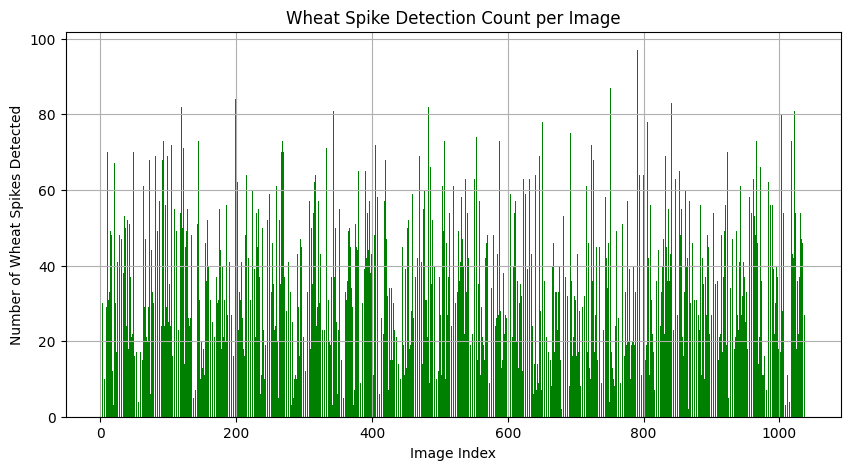

In [21]:
import matplotlib.pyplot as plt
image_indices = list(range(1, len(wheat_counts) + 1))

# Plotting
plt.figure(figsize=(10, 5))  # Set the figure size
plt.bar(image_indices, wheat_counts, color='green')
plt.xlabel('Image Index')
plt.ylabel('Number of Wheat Spikes Detected')
plt.title('Wheat Spike Detection Count per Image')
plt.grid(True)
plt.show()

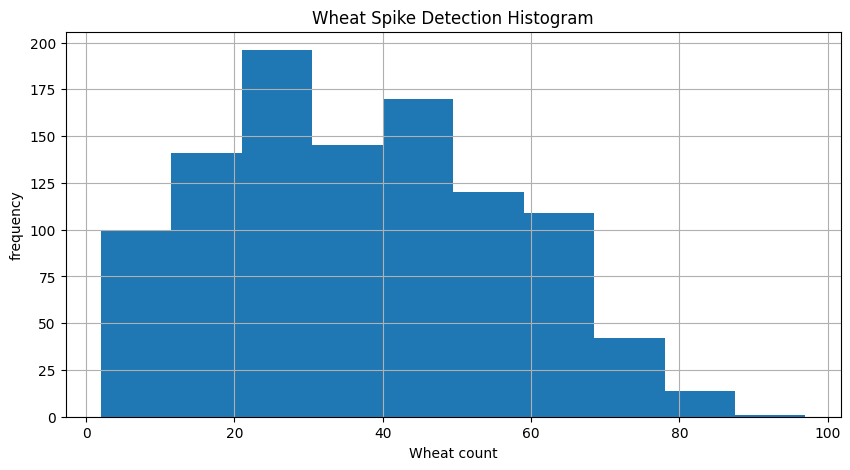

In [22]:

# Plotting
plt.figure(figsize=(10, 5))  # Set the figure size
plt.hist(wheat_counts)
plt.xlabel('Wheat count')
plt.ylabel('frequency')
plt.title('Wheat Spike Detection Histogram')
plt.grid(True)
plt.show()

In [10]:
re.findall(r': \d+x\d+ (\d+) wheats', result.stdout)

[]

In [15]:
!yolo task=detect \mode=predict \model={HOME}/runs/detect/train2/weights/best.pt \conf=0.5 \source={dataset.location}/test/images

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.14
    Uninstalling ultralytics-8.2.14:
      Successfully uninstalled ultralytics-8.2.14
